In [1]:
import os
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import mplhep as hep
from coffea.hist import Hist, plot
from coffea.util import load

/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
cfg = {
    "variables" : {
        "muon_pt" : {'binning' : {'n_or_arr' : 200, 'lo' : 0, 'hi' : 2000}, 'xlim' : (0,500),  'xlabel' : "$p_{T}^{\mu}$ [GeV]"},
        "muon_eta" : None,
        "muon_phi" : None,
        "electron_pt" : {'binning' : {'n_or_arr' : [0, 30, 35, 40, 50, 60, 70, 80, 90, 100, 200, 500, 2000]}, 'xlim' : (30,500),  'xlabel' : "$p_{T}^{e}$ [GeV]"},
        "electron_eta" : {'binning' : {'n_or_arr' : [-2.5, -2.0, -1.5660, -1.4442, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4442, 1.5660, 2.0, 2.5]}, 'xlim' : (-2.5,2.5), 'xlabel' : "Electron $\eta$"},
        "electron_etaSC" : {'binning' : {'n_or_arr' : [-2.5, -2.0, -1.5660, -1.4442, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4442, 1.5660, 2.0, 2.5]}, 'xlim' : (-2.5,2.5), 'xlabel' : "Electron Supercluster $\eta$"},
        "electron_phi" : {'binning' : {'n_or_arr' : 24, 'lo' : -pi, 'hi' : pi}, 'xlim' : (-pi,pi), 'xlabel' : "$\phi_{e}$"},
        "jet_pt" : None,
        "jet_eta" : None,
        "jet_phi" : None,
        "nmuon" : None,
        "nelectron" : None,
        "nlep" : None,
        "njet" : None,
        "nbjet" : None,
        "ht" : None,
    },
}

In [3]:
filename = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_appliedSF/output.coffea"
plot_dir = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_appliedSF_v02/plots/datamc"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
output = load(filename)
output

{'sum_genweights': defaultdict_accumulator(float,
                         {'TTToSemiLeptonic': 143354138329.1336,
                          'TTTo2L2Nu': 10457567170.13379}),
 'cutflow': {'Ele32_EleHT_pass_triggerSF': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 13707,
                           'DATA': 30034,
                           'TTTo2L2Nu': 942905}),
  'Ele32_EleHT_fail_triggerSF': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 20118,
                           'DATA': 12848,
                           'TTTo2L2Nu': 336815}),
  'Ele32_EleHT_pass_lowHT': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 9417,
                           'DATA': 19841,
                           'TTTo2L2Nu': 615560}),
  'Ele32_EleHT_fail_lowHT': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 14693,
                           'DATA': 8864,
                           'TTTo2L2Nu': 229120

In [4]:
h = output["hist2d_electron_etaSC_vs_electron_pt"]
h

<Hist (sample,cat,year,era,var,pt,etaSC) instance at 0x7fc64ddb94c0>

In [5]:
h.identifiers('sample')

[<StringBin (DATA) instance at 0x7fc6fa98e940>,
 <StringBin (TTTo2L2Nu) instance at 0x7fc6fa98e9a0>,
 <StringBin (TTToSemiLeptonic) instance at 0x7fc6fa98e8e0>]

In [6]:
datasets = [str(s) for s in h.identifiers('sample')]
datasets_mc = list(filter(lambda x : 'TTTo' in x, datasets))
h_data = h['DATA'].sum('sample', 'year', 'era')
h_mc = h[datasets_mc].sum('sample', 'year', 'era')
h_mc.values()

{('Ele32_EleHT_pass_triggerSF',
  'nominal'): array([[5.63880445e+00, 3.15895077e+01, 0.00000000e+00, 1.76562672e+01,
         1.57830104e+01, 2.49218854e+01, 2.88738404e+01, 3.28128860e+01,
         3.00425316e+01, 3.02681364e+01, 2.67270875e+01, 3.02321928e+01,
         2.78845824e+01, 2.66681976e+01, 2.05404780e+01, 1.50287403e+01,
         1.77836263e+01, 0.00000000e+00, 2.85952386e+01, 7.06662013e+00],
        [5.21605198e+01, 1.60202949e+02, 0.00000000e+00, 1.05103101e+02,
         9.36970819e+01, 1.40779626e+02, 1.46543511e+02, 1.73927573e+02,
         1.56127868e+02, 1.46533171e+02, 1.41562023e+02, 1.60480487e+02,
         1.54785825e+02, 1.48395561e+02, 1.30587264e+02, 1.04989991e+02,
         1.11999535e+02, 0.00000000e+00, 1.37501790e+02, 5.21073005e+01],
        [8.93185520e+01, 1.77399696e+02, 0.00000000e+00, 1.35428108e+02,
         1.33457269e+02, 1.47970166e+02, 1.62696947e+02, 1.75020773e+02,
         1.80297466e+02, 1.71710523e+02, 1.78892316e+02, 1.73532452e+02,
    

In [7]:
categories = [str(s) for s in h.identifiers('cat') if not 'inclusive' in str(s)]
print(categories)
cat = "Ele32_EleHT_pass_triggerSF"
eff_mc   = h_mc[(cat, 'nominal')].sum('cat', 'var').values()[()]/h_mc[('inclusive', 'nominal')].sum('cat', 'var').values()[()]
eff_data = h_data[(cat, 'nominal')].sum('cat', 'var').values()[()]/h_data[('inclusive', 'nominal')].sum('cat', 'var').values()[()]
sf = eff_data/eff_mc
sf = np.nan_to_num(np.where(~np.isinf(sf), sf, np.nan))
sf

['Ele32_EleHT_fail_highHT', 'Ele32_EleHT_fail_lowHT', 'Ele32_EleHT_fail_triggerSF', 'Ele32_EleHT_pass_highHT', 'Ele32_EleHT_pass_lowHT', 'Ele32_EleHT_pass_triggerSF', 'triggerSF']


/tmp/ipykernel_35062/4082419120.py:4: RuntimeWarning: invalid value encountered in true_divide
  eff_mc   = h_mc[(cat, 'nominal')].sum('cat', 'var').values()[()]/h_mc[('inclusive', 'nominal')].sum('cat', 'var').values()[()]
/tmp/ipykernel_35062/4082419120.py:5: RuntimeWarning: invalid value encountered in true_divide
  eff_data = h_data[(cat, 'nominal')].sum('cat', 'var').values()[()]/h_data[('inclusive', 'nominal')].sum('cat', 'var').values()[()]


array([[2.03739475, 2.38068874, 0.        , 0.82456526, 1.14123416,
        4.10827129, 2.75392696, 1.37981957, 1.64993092, 2.83431482,
        1.30518221, 1.74618354, 1.07088196, 1.19128681, 1.00908813,
        2.21456135, 3.26468175, 0.        , 1.58428584, 1.6987331 ],
       [1.26640456, 0.87174808, 0.        , 0.86957216, 0.79298553,
        0.94600898, 0.92037982, 0.97003947, 0.86617423, 0.85342242,
        0.90040768, 0.86130493, 0.87711479, 0.92143297, 0.8965432 ,
        0.83034713, 0.88958011, 0.        , 0.88409905, 1.18637673],
       [1.03010405, 0.94596206, 0.        , 0.99783321, 0.94498449,
        0.96676741, 0.97308724, 1.00074919, 0.95364981, 0.96435222,
        0.97284426, 0.96939668, 0.96277844, 0.93698278, 0.97005336,
        0.97887424, 0.85247283, 0.        , 0.9422853 , 1.03600498],
       [0.9595447 , 0.98092327, 0.        , 0.94037571, 1.01856843,
        0.96422583, 0.99647694, 0.97228291, 1.00844718, 0.97047411,
        0.97438861, 0.90223078, 0.9567172 , 0

In [8]:
axis_pt = h.axes()[-2]
axis_eta = h.axes()[-1]
axis_eta.edges()

array([-2.5   , -2.    , -1.566 , -1.4442, -1.2   , -1.    , -0.8   ,
       -0.6   , -0.4   , -0.2   ,  0.    ,  0.2   ,  0.4   ,  0.6   ,
        0.8   ,  1.    ,  1.2   ,  1.4442,  1.566 ,  2.    ,  2.5   ])

In [9]:
binwidth_pt = np.ediff1d(axis_pt.edges())
binwidth_eta = np.ediff1d(axis_eta.edges())

bincenter_pt = axis_pt.edges()[:-1] + 0.5*binwidth_pt
bincenter_eta = axis_eta.edges()[:-1] + 0.5*binwidth_eta
bincenter_eta

array([-2.25  , -1.783 , -1.5051, -1.3221, -1.1   , -0.9   , -0.7   ,
       -0.5   , -0.3   , -0.1   ,  0.1   ,  0.3   ,  0.5   ,  0.7   ,
        0.9   ,  1.1   ,  1.3221,  1.5051,  1.783 ,  2.25  ])

In [10]:
eta, pt = np.meshgrid(bincenter_eta, bincenter_pt)
pt.shape

(12, 20)

In [11]:
sf.shape

(12, 20)

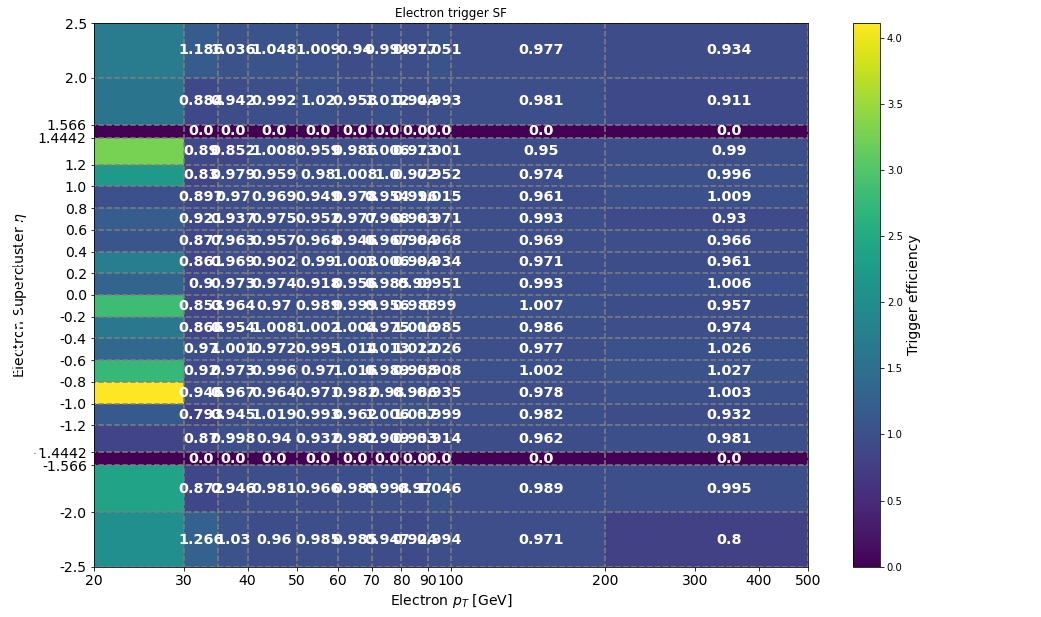

In [12]:
fontsize=14

fig, ax = plt.subplots(figsize=[16,10])
hist, xbins, ybins, im = plt.hist2d(pt.flatten(), eta.flatten(), weights=sf.flatten(), bins=(axis_pt.edges(), axis_eta.edges()))
plt.xlim(0, 500)
plt.xlabel(axis_pt.label, fontsize=fontsize)
plt.ylabel(axis_eta.label, fontsize=fontsize)
plt.xscale('log')
plt.xlim(20, 500)
xticks = [20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]
yticks = axis_eta.edges()
plt.xticks(xticks, [str(t) for t in xticks], fontsize=fontsize)
plt.yticks(yticks, [str(t) for t in yticks], fontsize=fontsize)
plt.hlines(axis_eta.edges(), axis_pt.edges()[-1], axis_pt.edges()[0], linestyle='--', color='gray')
plt.vlines(axis_pt.edges(), axis_eta.edges()[-1], axis_eta.edges()[0], linestyle='--', color='gray')

for (i, x) in enumerate(bincenter_pt):
    for (j, y) in enumerate(bincenter_eta):
        ax.text(x, y, round(sf[i][j], 3), 
                color="w", ha="center", va="center", fontsize="x-large", fontweight="bold")

plt.title("Electron trigger SF")
cbar = plt.colorbar();
#cbar.set_ticklabels(cbar.ax.get_yticklabels(), fontsize=fontsize)
cbar.set_label("Trigger efficiency", fontsize=fontsize)

In [13]:
output['trigger_efficiency']['Ele32_EleHT_pass_triggerSF']

{'mc': 0.6192625250269277,
 'data': 0.7003871088102234,
 'sf': 1.1310019264927553}

In [14]:
color_mc = {'TTo2L2Nu' : 'dodgerblue', 'TTToSemiLeptonic' : 'tomato'}
opts_mc  = {
    'facecolor': [color_mc[d] for d in color_mc.keys()],
    'edgecolor': 'black',
    'alpha': 1.0
}
opts_data = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:38: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/work/mmarcheg/mi

Ele32_EleHT_fail_triggerSF


/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:38: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/work/mmarcheg/mi

Ele32_EleHT_pass_triggerSF


/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:38: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/work/mmarcheg/mi

triggerSF


/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:458: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


Ele32_EleHT_fail_triggerSF


/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:458: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


Ele32_EleHT_pass_triggerSF


/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:458: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


triggerSF


/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:458: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


Ele32_EleHT_fail_triggerSF


/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:458: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


Ele32_EleHT_pass_triggerSF


/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:458: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


triggerSF


/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:38: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/work/mmarcheg/mi

Ele32_EleHT_fail_triggerSF


/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:38: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/work/mmarcheg/mi

Ele32_EleHT_pass_triggerSF


/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:38: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/work/mmarcheg/mi

triggerSF


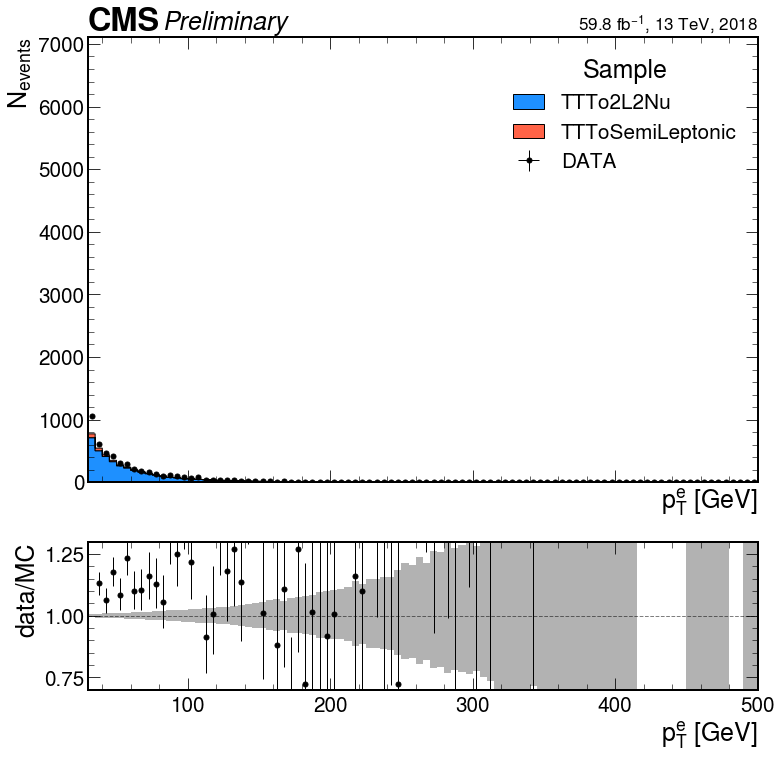

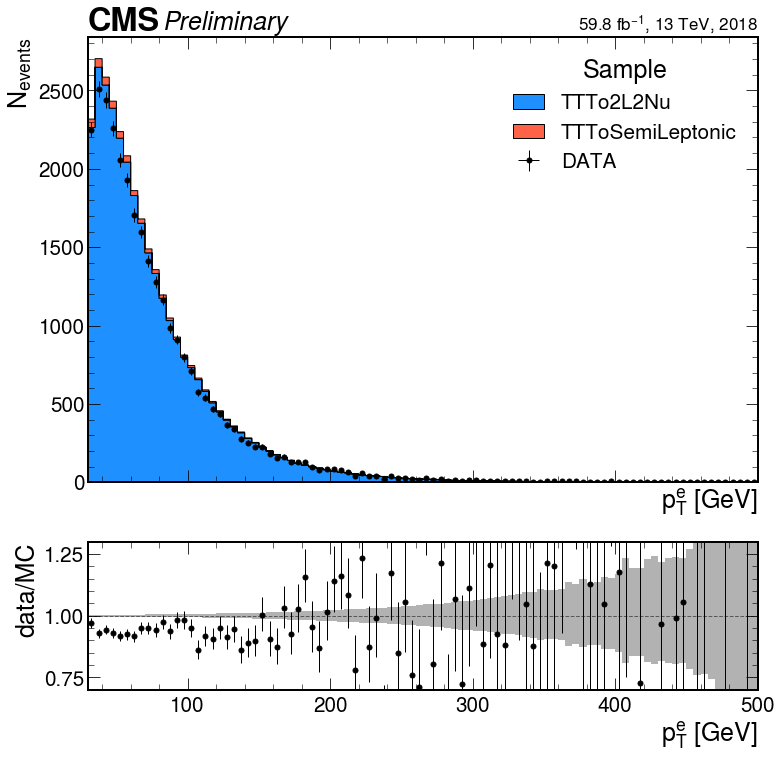

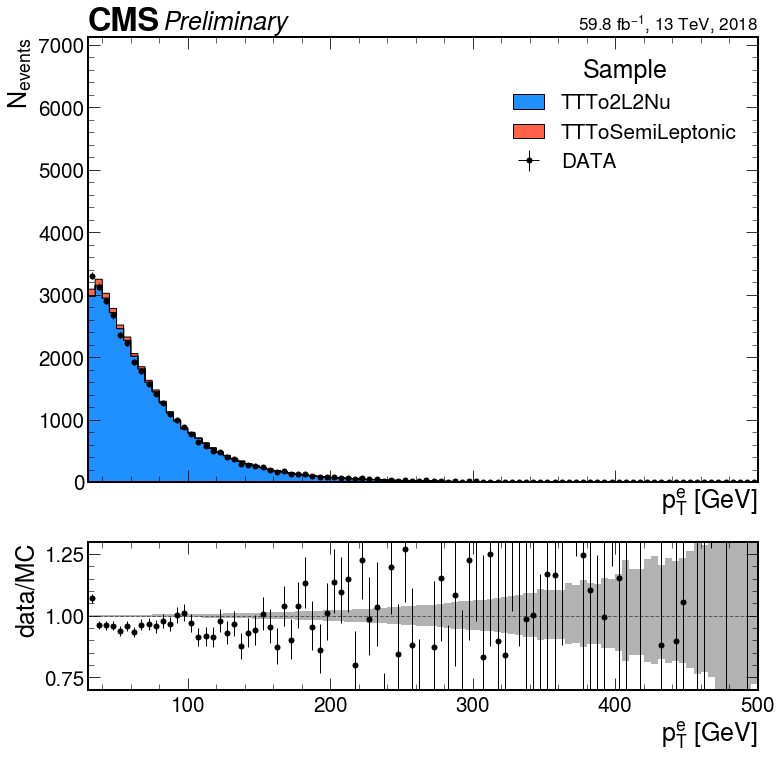

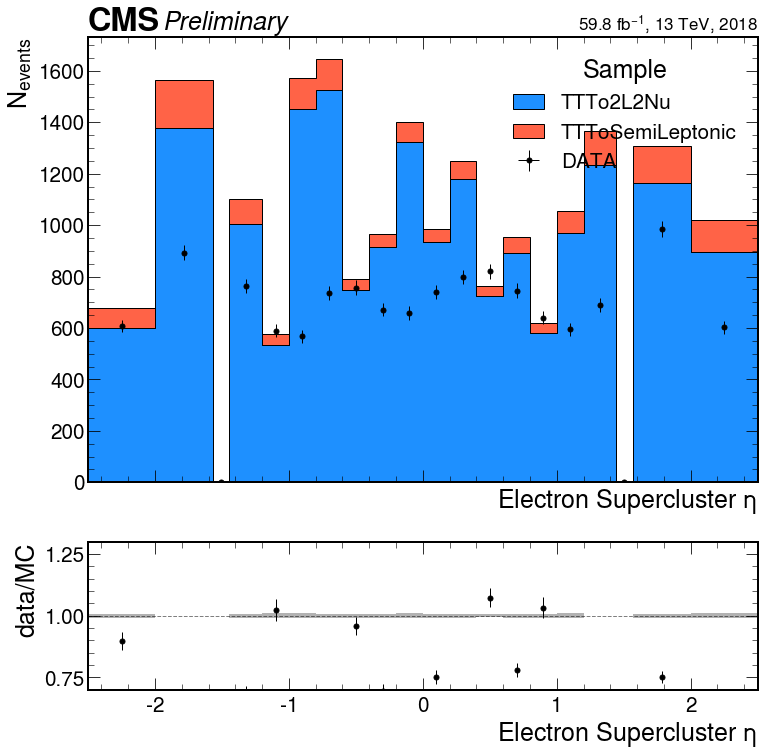

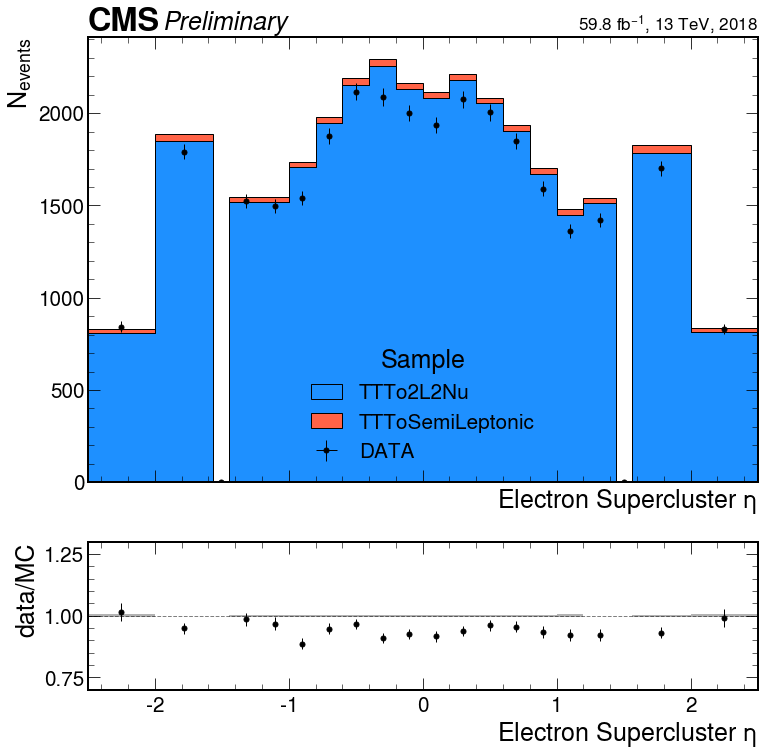

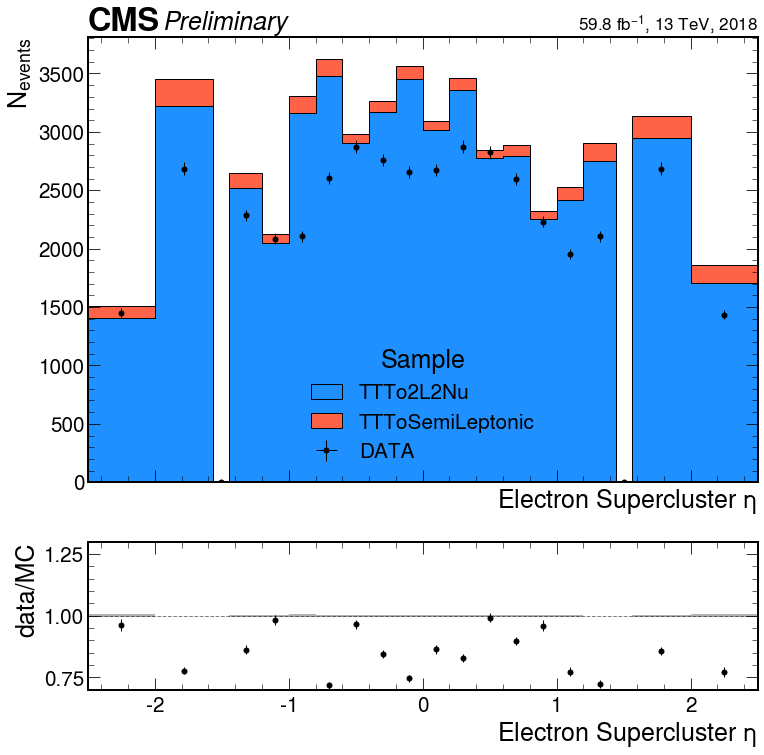

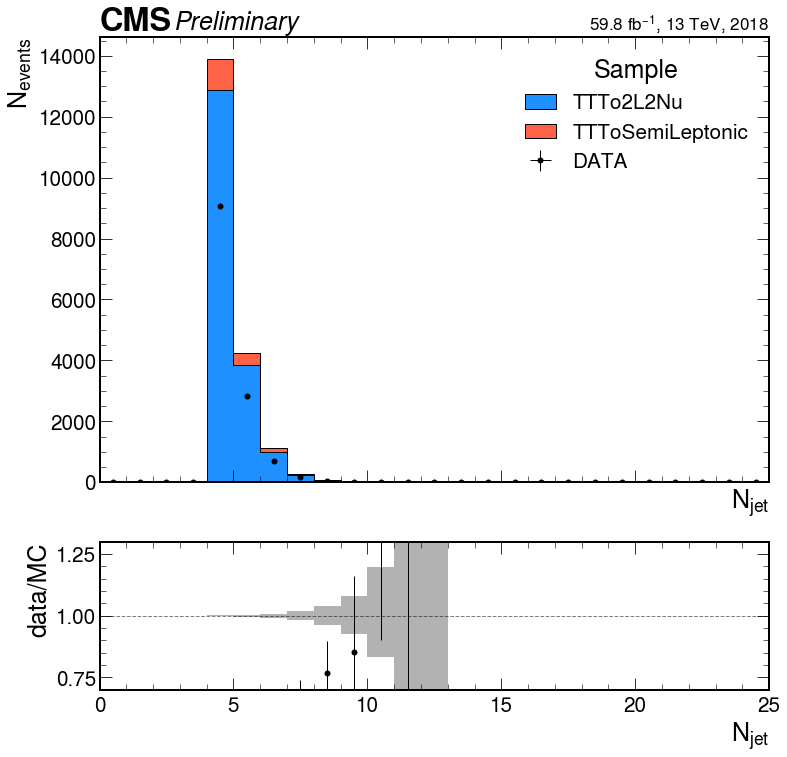

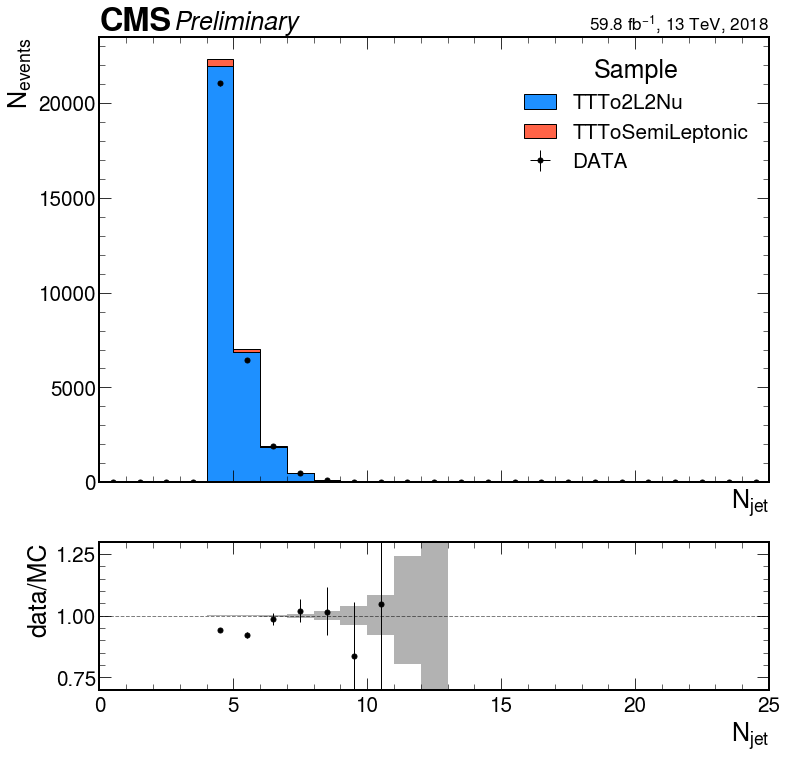

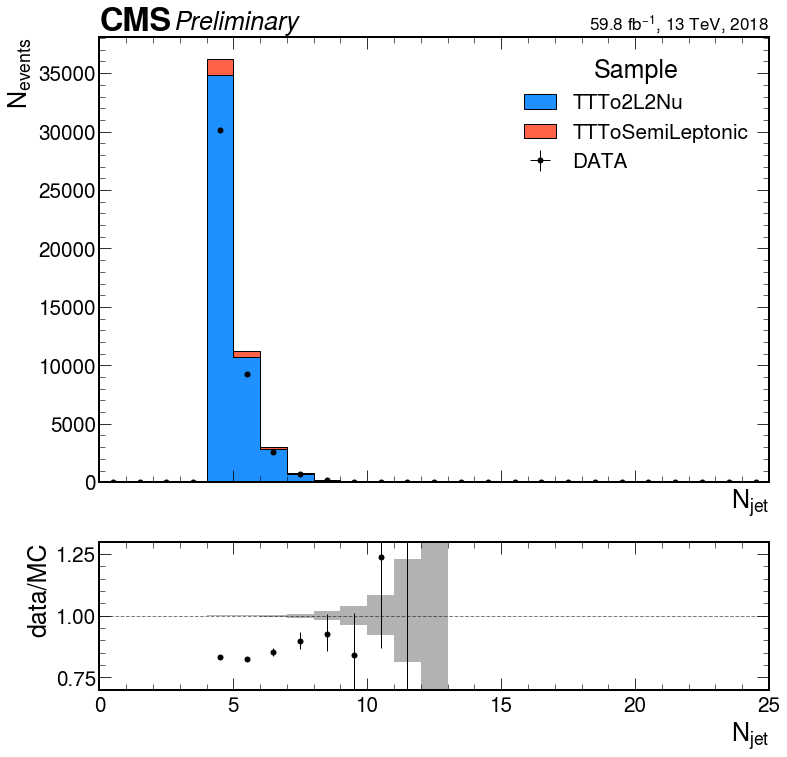

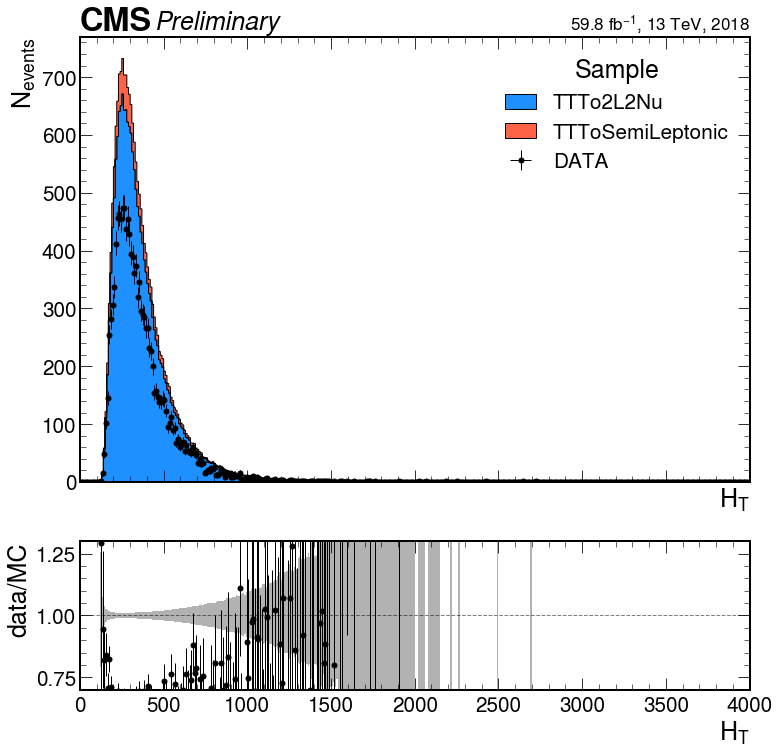

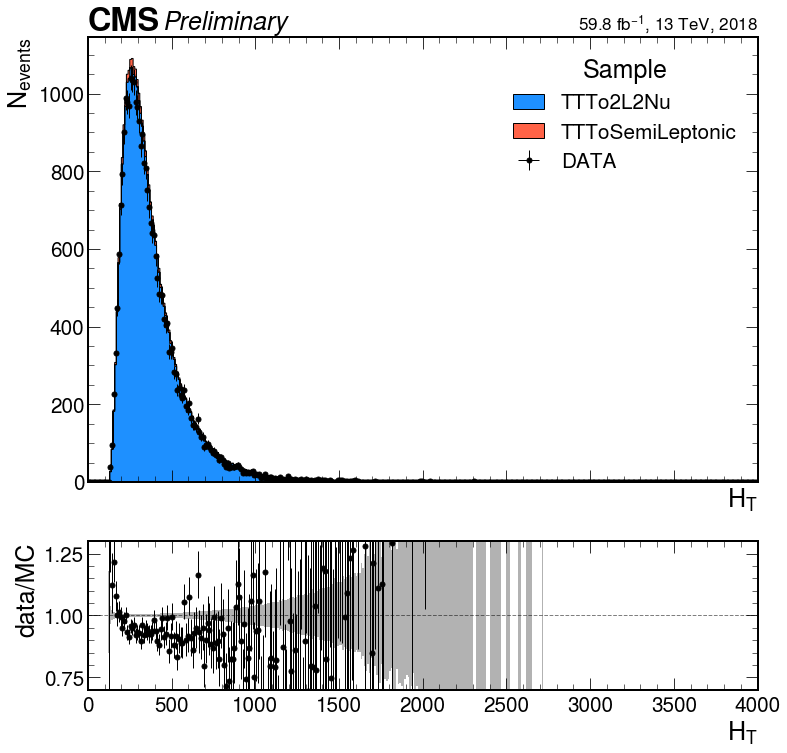

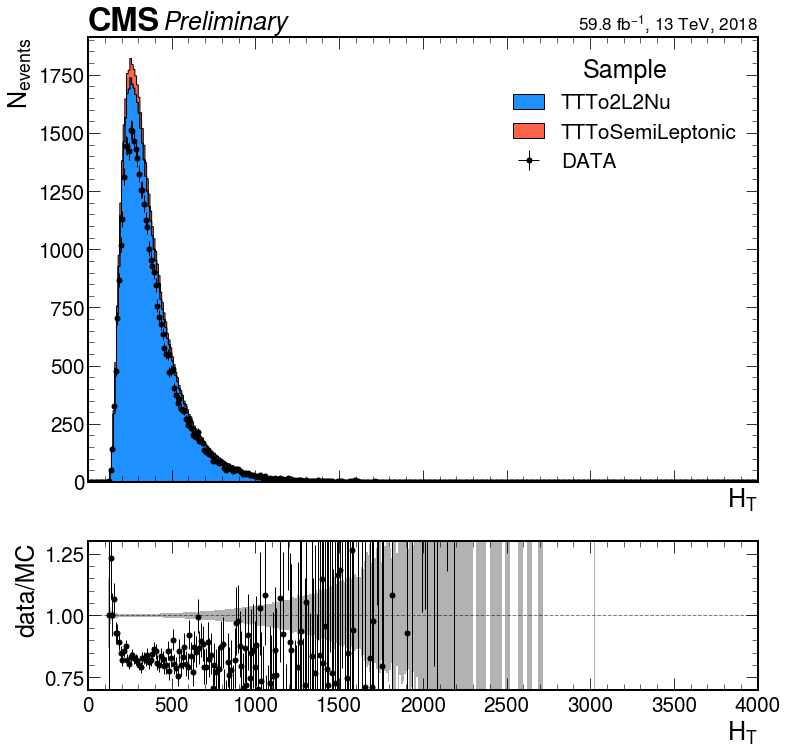

In [15]:
lumi = 59.8
fontsize = 25
plt.style.use([hep.style.ROOT, {'font.size': fontsize}])
for histname in ['hist_electron_pt', 'hist_electron_etaSC', 'hist_njet', 'hist_ht']:
    varname = histname.split('hist_')[-1]
    h_ele = output[histname].sum('year', 'era')
    categories_to_plot = [cat for cat in categories if cat.endswith('triggerSF')]
    for cat in categories_to_plot:
        fig, (ax, rax) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        plot.plot1d(h_ele[(datasets_mc, cat,'nominal')].sum('cat', 'var'), ax=ax, fill_opts=opts_mc, stack=True)
        plot.plot1d(h_ele[(['DATA'], cat,'nominal')].sum('cat', 'var'), ax=ax, error_opts=opts_data, clear=False)
        plot.plotratio(num=h_ele[(['DATA'], cat,'nominal')].sum('cat', 'var', 'sample'), denom=h_ele[(datasets_mc, cat,'nominal')].sum('cat', 'var', 'sample'), ax=rax,
                                   error_opts=opts_data, denom_fill_opts={}, guide_opts={}, unc='num')
        hep.cms.text("Preliminary", loc=0, ax=ax)
        hep.cms.lumitext(text=f'{lumi}' + r' fb$^{-1}$, 13 TeV, 2018', fontsize=18, ax=ax)
        print(cat)
        #ax.set_title(cat)
        for axis in [ax, rax]:
            if cfg['variables'][varname] == None: continue
            axis.set_xlim(*cfg['variables'][varname]['xlim'])
            axis.xaxis.label.set_size(fontsize)
            axis.yaxis.label.set_size(fontsize)
        rax.set_ylim(0.7, 1.3)
        rax.set_ylabel("data/MC")
        plt.savefig(os.path.join(plot_dir, f"{histname}_{cat}.png"), dpi=150, format="png")

In [19]:
filename = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_allsystematics_v04/output.coffea"
plot_dir = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_allsystematics_v04/plots/datamc"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
output_noSF = load(filename)
output_noSF.keys()

dict_keys(['sum_genweights', 'cutflow', 'sumw', 'seed_chunk', 'hist_muon_pt', 'hist_muon_eta', 'hist_muon_phi', 'hist_electron_pt', 'hist_electron_eta', 'hist_electron_etaSC', 'hist_electron_phi', 'hist_jet_pt', 'hist_jet_eta', 'hist_jet_phi', 'hist_nmuon', 'hist_nelectron', 'hist_nlep', 'hist_njet', 'hist_nbjet', 'hist_ht', 'hist2d_electron_etaSC_vs_electron_pt', 'hist2d_electron_phi_vs_electron_pt', 'hist2d_electron_etaSC_vs_electron_phi', 'trigger_efficiency', 'scale_genweight'])

/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:458: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/m

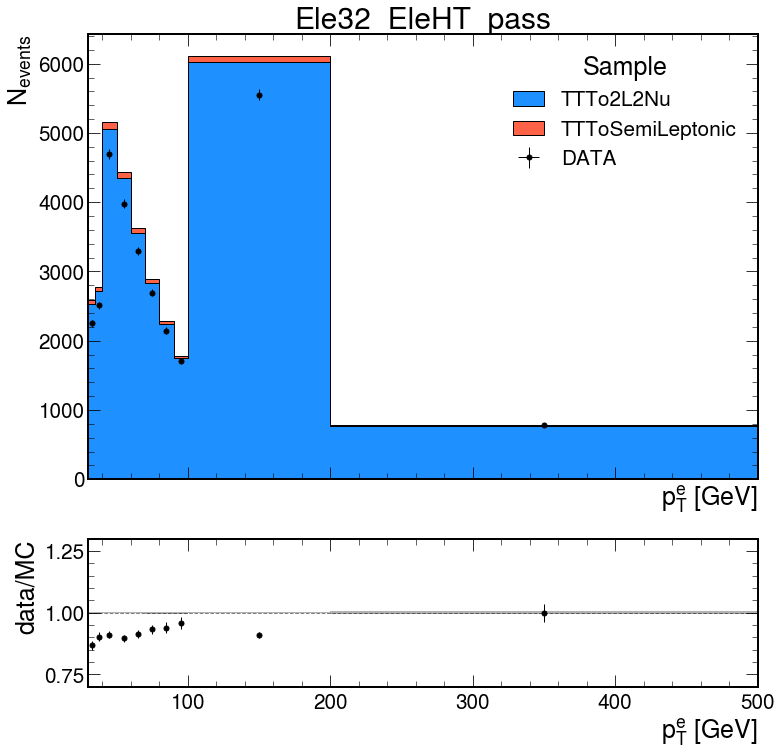

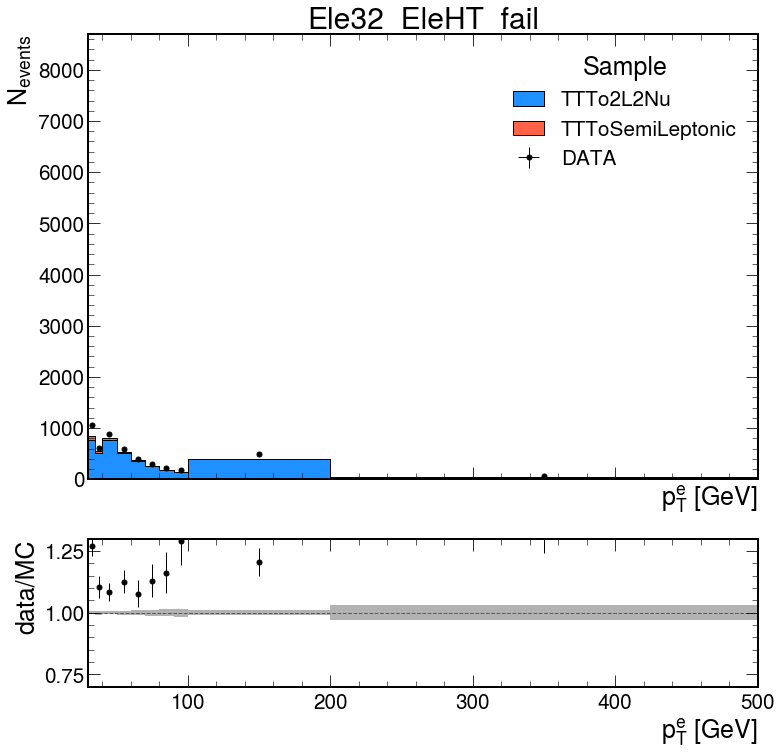

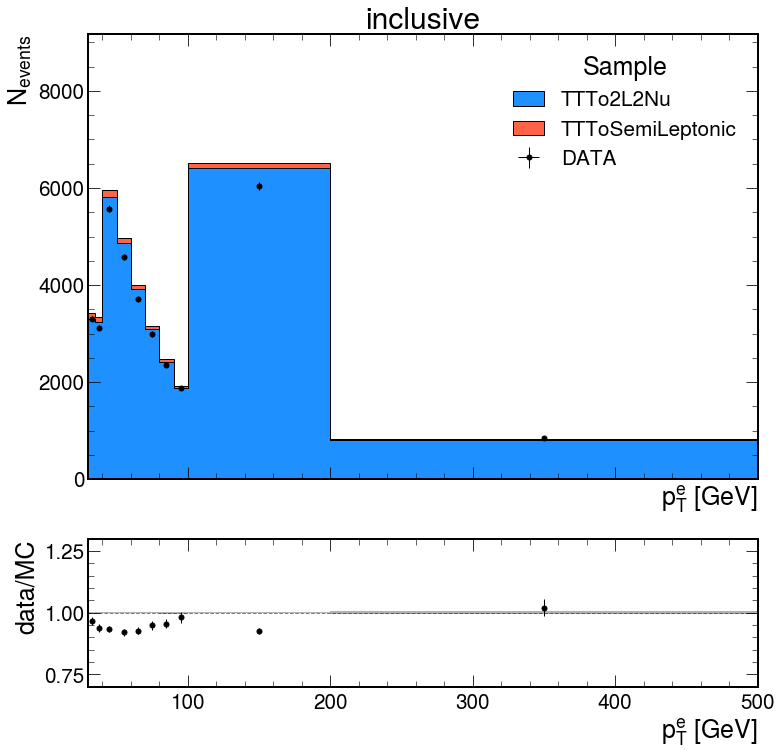

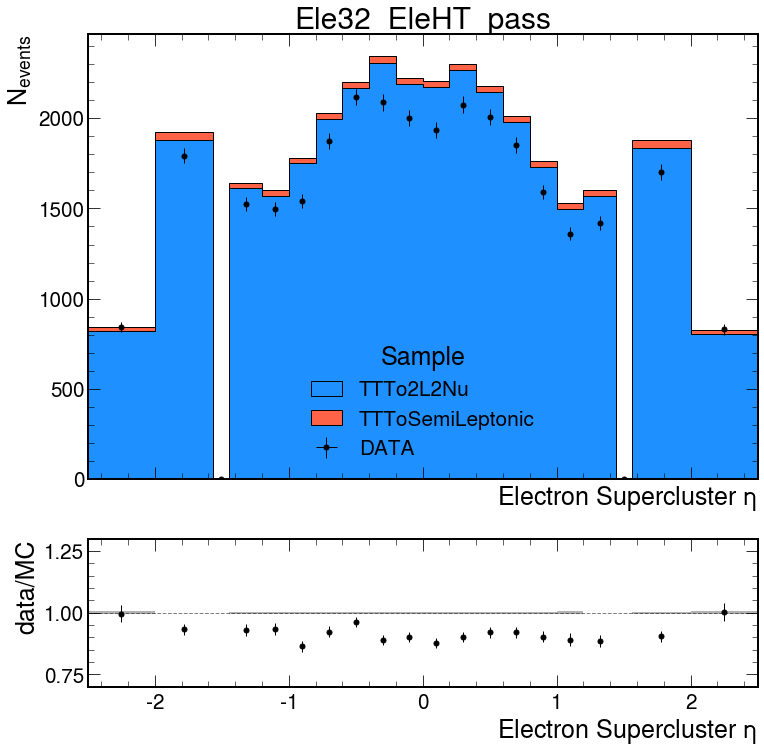

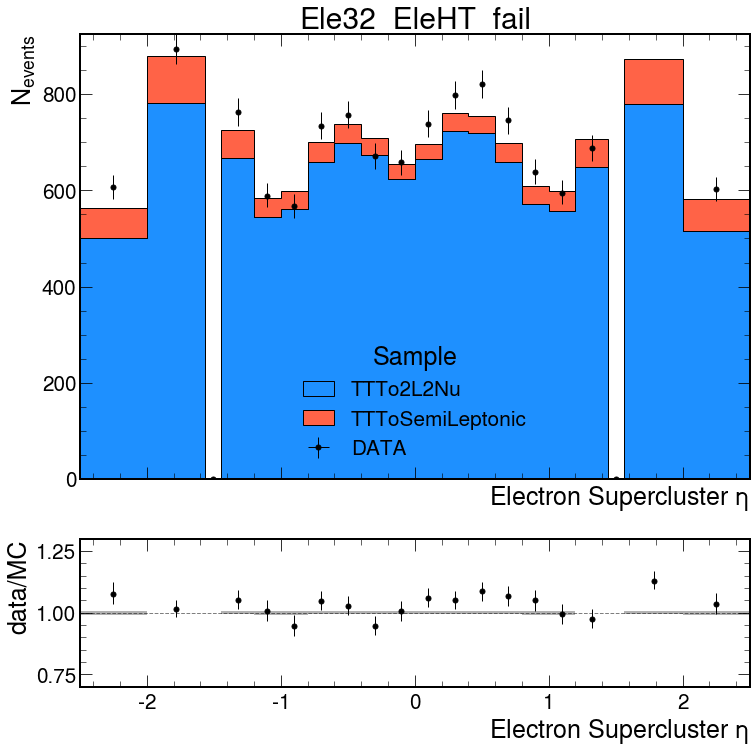

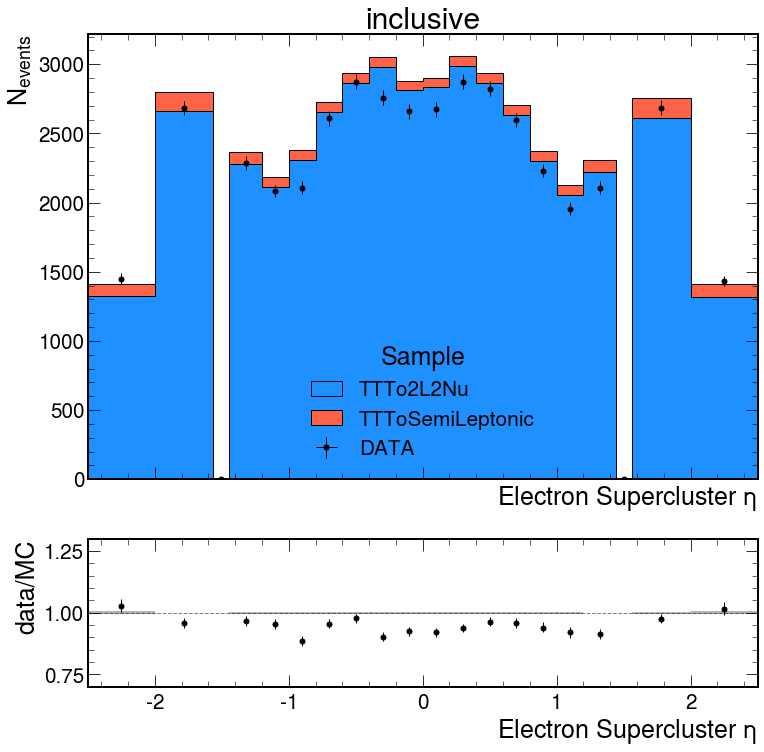

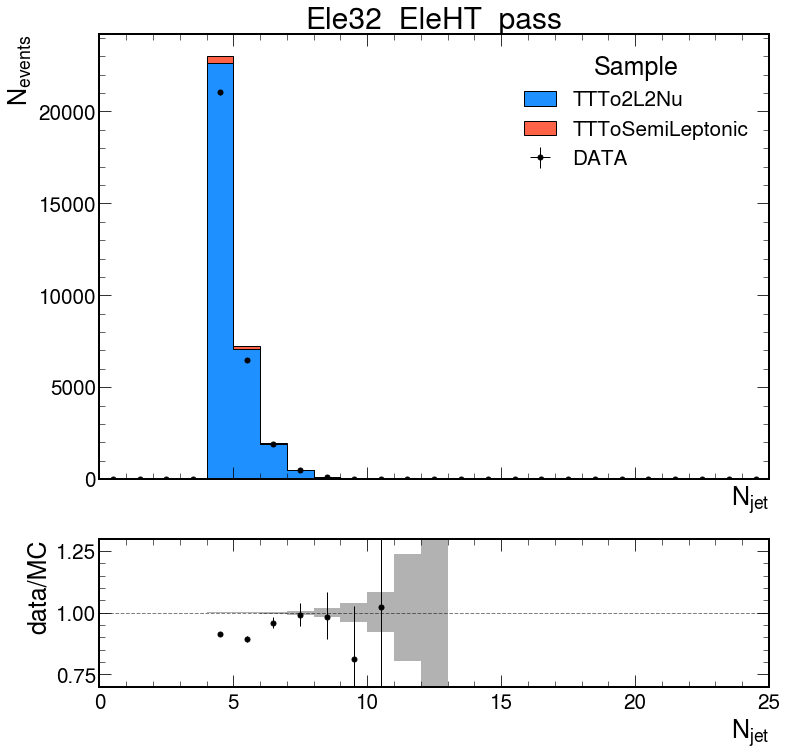

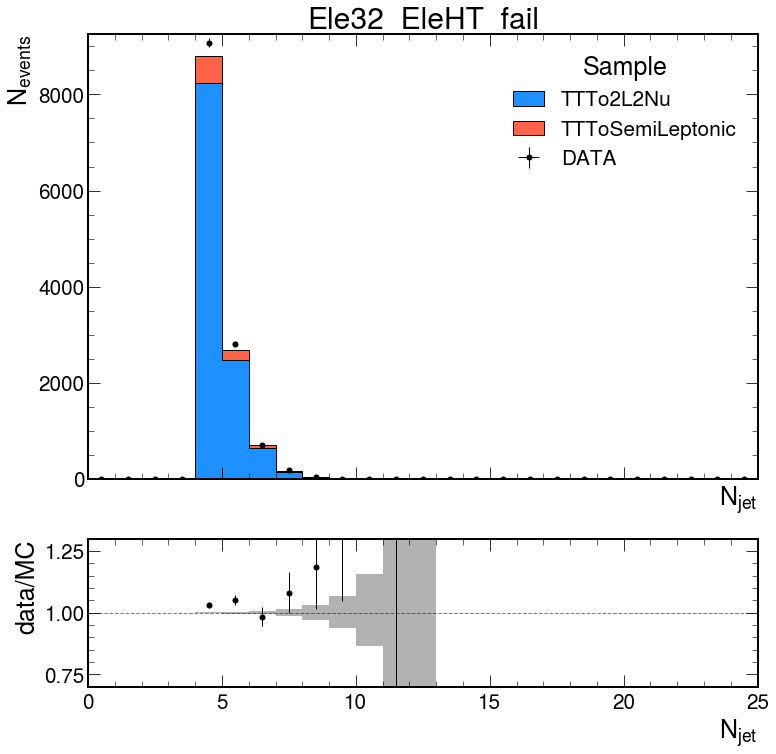

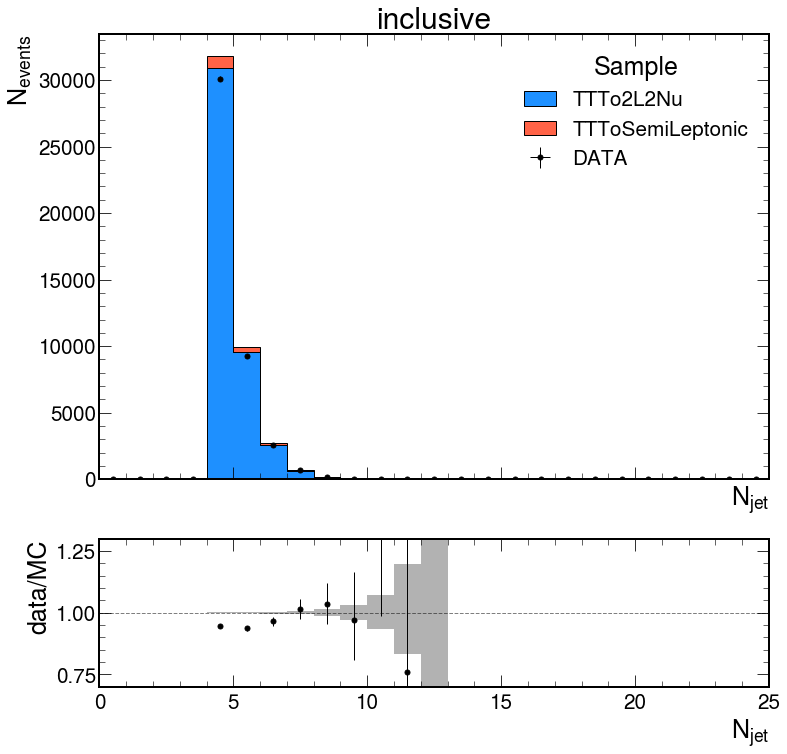

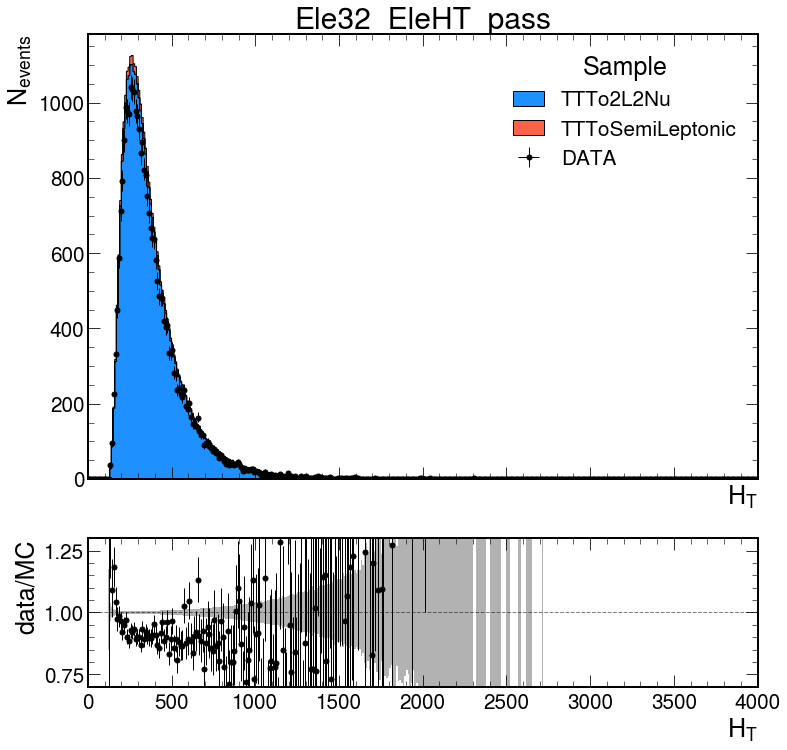

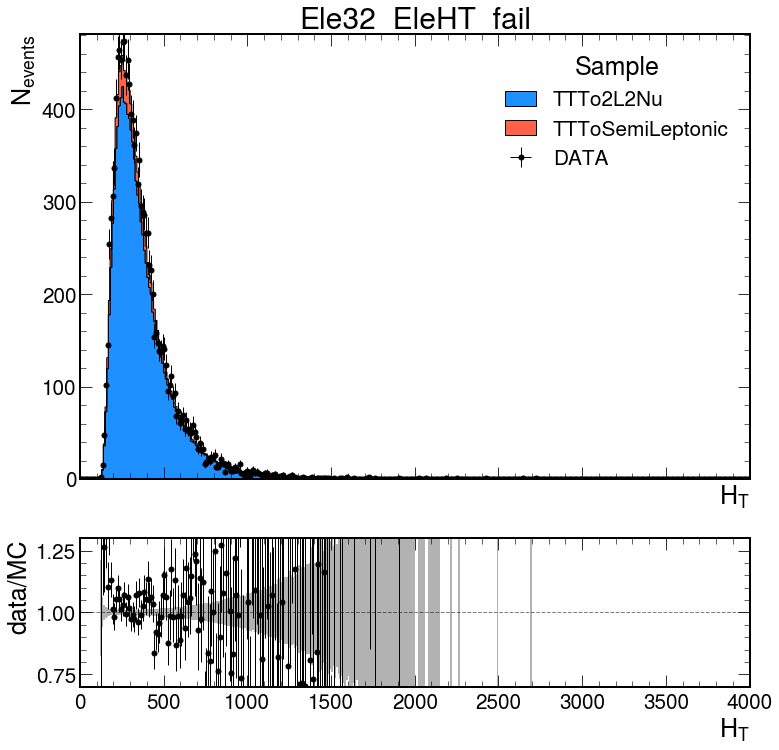

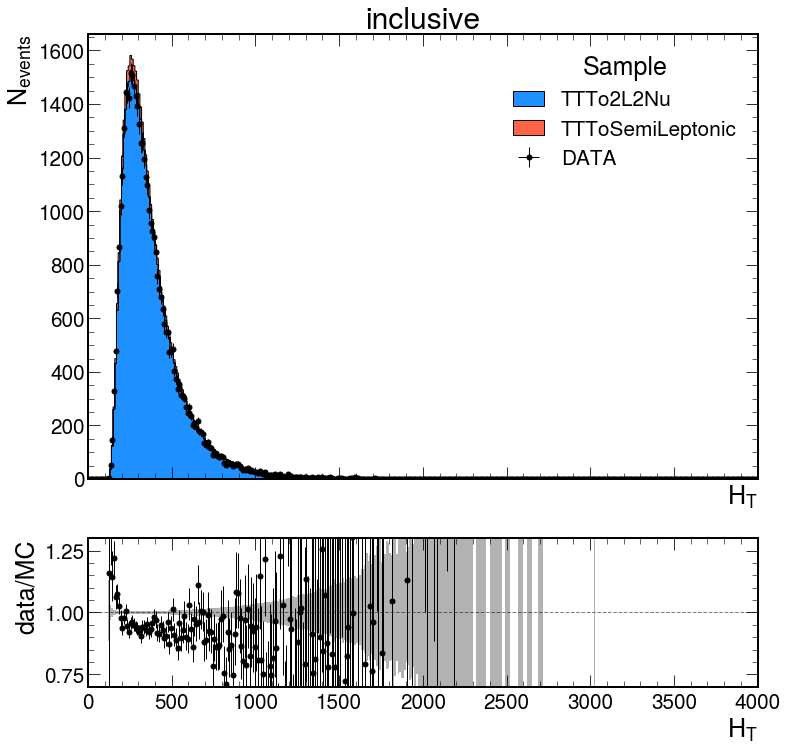

In [20]:
fontsize = 25
plt.style.use([hep.style.ROOT, {'font.size': fontsize}])
for histname in ['hist_electron_pt', 'hist_electron_etaSC', 'hist_njet', 'hist_ht']:
    varname = histname.split('hist_')[-1]
    h_ele = output_noSF[histname].sum('year', 'era')
    categories_to_plot = ["Ele32_EleHT_pass", "Ele32_EleHT_fail", "inclusive"]
    for cat in categories_to_plot:
        fig, (ax, rax) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        plot.plot1d(h_ele[(datasets_mc, cat,'nominal')].sum('cat', 'var'), ax=ax, fill_opts=opts_mc, stack=True)
        plot.plot1d(h_ele[(['DATA'], cat,'nominal')].sum('cat', 'var'), ax=ax, error_opts=opts_data, clear=False)
        plot.plotratio(num=h_ele[(['DATA'], cat,'nominal')].sum('cat', 'var', 'sample'), denom=h_ele[(datasets_mc, cat,'nominal')].sum('cat', 'var', 'sample'), ax=rax,
                                   error_opts=opts_data, denom_fill_opts={}, guide_opts={}, unc='num')
        ax.set_title(cat)
        for axis in [ax, rax]:
            if cfg['variables'][varname] == None: continue
            axis.set_xlim(*cfg['variables'][varname]['xlim'])
            axis.xaxis.label.set_size(fontsize)
            axis.yaxis.label.set_size(fontsize)
        rax.set_ylim(0.7, 1.3)
        rax.set_ylabel("data/MC")
        plt.savefig(os.path.join(plot_dir, f"{histname}_{cat}.png"), dpi=150, format="png")

In [18]:
output_noSF['hist_electron_pt']

<Hist (sample,cat,year,era,var,pt) instance at 0x7fc643759f70>